<a href="https://colab.research.google.com/github/YdkArda/ScienceAndArt/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install huggingface_hub


In [7]:

from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')

from huggingface_hub import InferenceClient
import json

# Modeli kullanmadan önce Hugging Face sitesinden lisansını kabul ettiğinizden emin olun!
repo_id = "Microsoft/phi-3-mini-4k-instruct"

# Client'ı token ile başlatın (os.environ'dan otomatik okur,
# ama 'token=HF_TOKEN' şeklinde manuel de verebilirsiniz)
llm_client = InferenceClient(
    model=repo_id,
    token=HF_TOKEN, # Token'ı burada belirtmek en garantisidir
    timeout=120
)

# Phi-3 için özel prompt formatı
def build_prompt(user_query):
    # Bu format modelin nasıl eğitildiğine bağlıdır ve önemlidir
    return f"<|user|>\n{user_query}<|end|>\n<|assistant|>\n"


def call_llm(inference_client: InferenceClient, prompt: str):

    # HATA BURADAYDI: .post() yerine .text_generation() kullanılmalı
    # ve parametreler doğrudan verilmeli.
    response = inference_client.text_generation(
        prompt=prompt,
        max_new_tokens=200,
        # 'temperature', 'top_p' gibi diğer parametreleri de buraya ekleyebilirsiniz
    )

    # HATA BURADAYDI: Dönen 'response' zaten metnin kendisidir (string).
    # json.loads.decode() işlemine gerek yoktur.
    return response

# Modeli doğru formatta çağır
formatted_prompt = build_prompt("what is happiness?")
response = call_llm(llm_client, formatted_prompt)

print(response)

StopIteration: 

In [10]:
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="fal-ai",
    api_key=HF_TOKEN,
)

# output is a PIL.Image object
image = client.text_to_image(
    "Istanbul Streets and bosphorus with cool cinema filters",
    model="tencent/HunyuanImage-3.0",
)

HfHubHTTPError: 402 Client Error: Payment Required for url: https://router.huggingface.co/fal-ai/fal-ai/hunyuan-image/v3/text-to-image (Request ID: Root=1-6903ccea-187338464aca4c2a217af2fc;33f75d3d-e203-4a8a-bda2-6dba2ba7fe55)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly included credits.

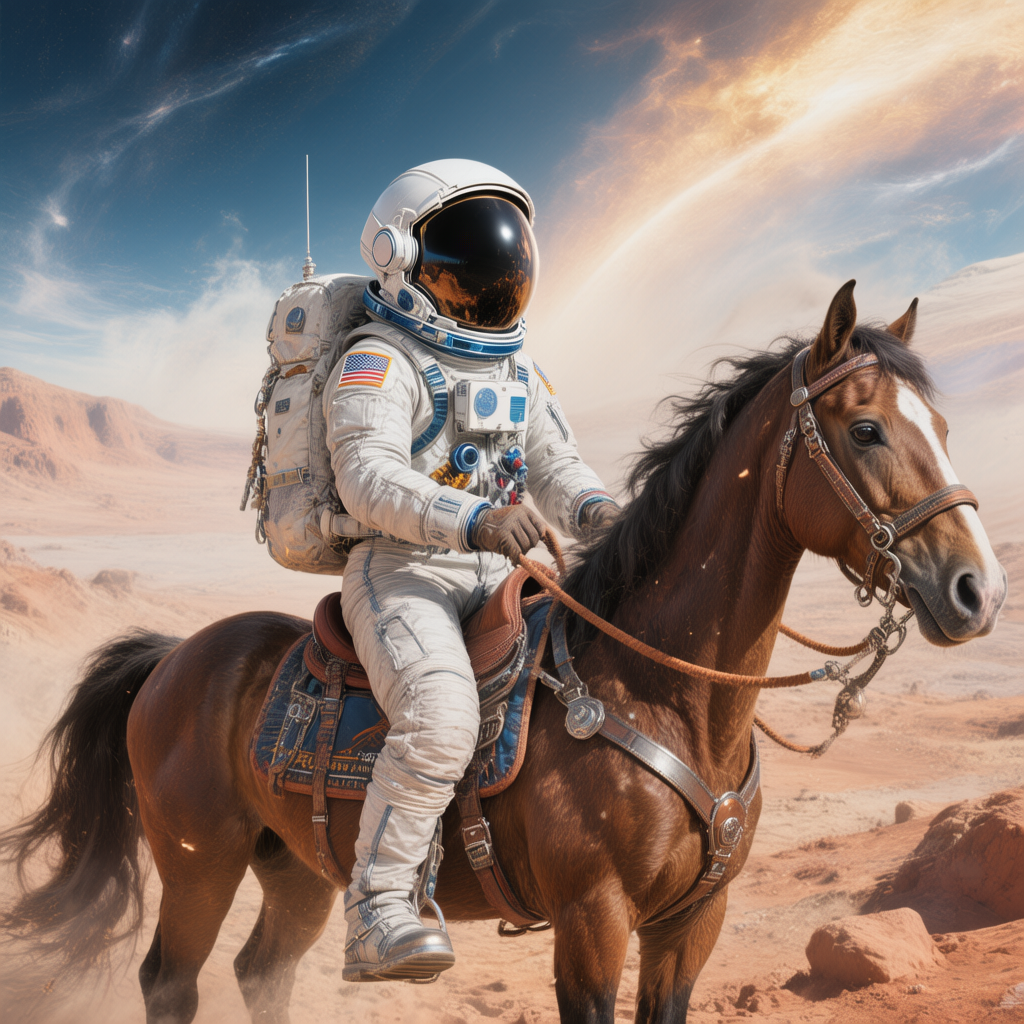

In [9]:
image